In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import PCA

# Завдання 1

In [30]:
def find_eigen(A: np.array):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    mul_by_A = A@eigenvectors
    mul_by_values = eigenvalues*eigenvectors
    print(f"A mulitiplied: {mul_by_A}\n")
    print(f"Eigenvalues multiplied: {mul_by_values}")
    return eigenvalues, eigenvectors



In [31]:
A = np.array([
    [1, 1, 2],
    [2, 3, 1],
    [1, 2, 5]
])
find_eigen(A)

A mulitiplied: [[-2.44669817 -0.34757866  0.3380617 ]
 [-2.88823035  0.2944433  -1.69030851]
 [-5.33492852 -0.05313536  1.01418511]]

Eigenvalues multiplied: [[-2.44669817 -0.34757866  0.3380617 ]
 [-2.88823035  0.2944433  -1.69030851]
 [-5.33492852 -0.05313536  1.01418511]]


(array([6.54138127, 0.45861873, 2.        ]),
 array([[-0.37403387, -0.75788151,  0.16903085],
        [-0.44153218,  0.64202195, -0.84515425],
        [-0.81556606, -0.11585955,  0.50709255]]))

# Завдання 2

## 1

((1280, 720, 3), <matplotlib.image.AxesImage at 0x10ebb4150>)

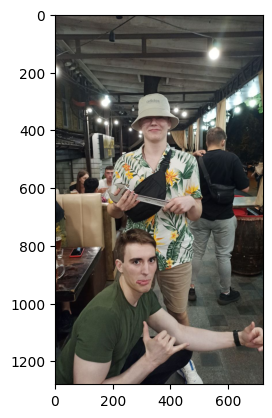

In [2]:
image_raw = imread("image.jpg")
image_raw.shape, plt.imshow(image_raw)

## 2

(array([[250, 268, 286, ..., 201, 201, 204],
        [250, 268, 286, ..., 195, 198, 198],
        [250, 265, 280, ..., 192, 195, 195],
        ...,
        [141, 135, 126, ..., 245, 227, 209],
        [138, 135, 129, ..., 239, 215, 191],
        [135, 135, 132, ..., 233, 209, 179]], dtype=uint64),
 1.0,
 (1280, 720))

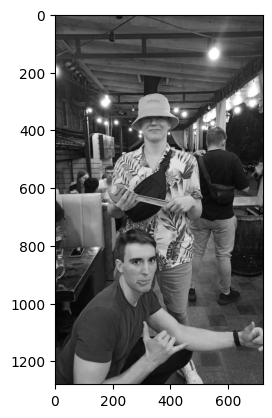

In [3]:
image_sum = image_raw.sum(axis=2)
image_bw = image_sum/image_sum.max()
image_sum, image_bw.max(), plt.imshow(image_bw, cmap="gray"), image_bw.shape

## 3

```
image_centered = image_bw - image_bw.mean()

сov_matrix = np.cov(image_centered)
eigenvalues, eigenvectors = np.linalg.eig(сov_matrix)
sort_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sort_index]
sorted_eigenvectors = eigenvectors[:, sort_index]

explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
```



In [31]:
pca = PCA()
pca.fit(image_bw)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1

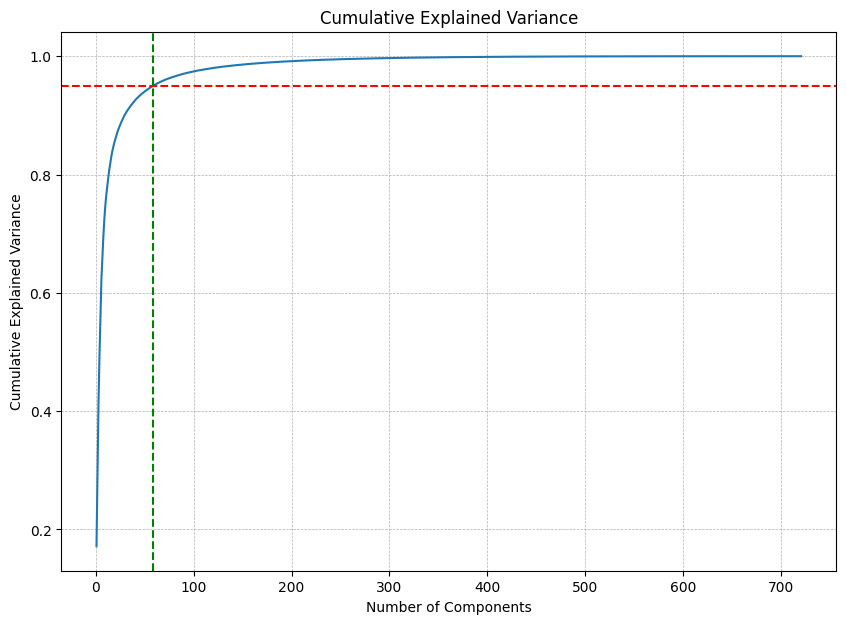

In [32]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=num_components, color='g', linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## 4

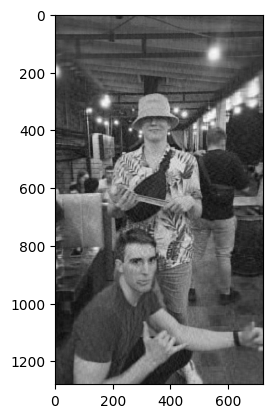

In [34]:
pca=PCA(n_components=num_components)
image_pca = pca.fit_transform(image_bw)
image_rec = pca.inverse_transform(image_pca)
plt.imshow(image_rec, cmap="gray")

## 5

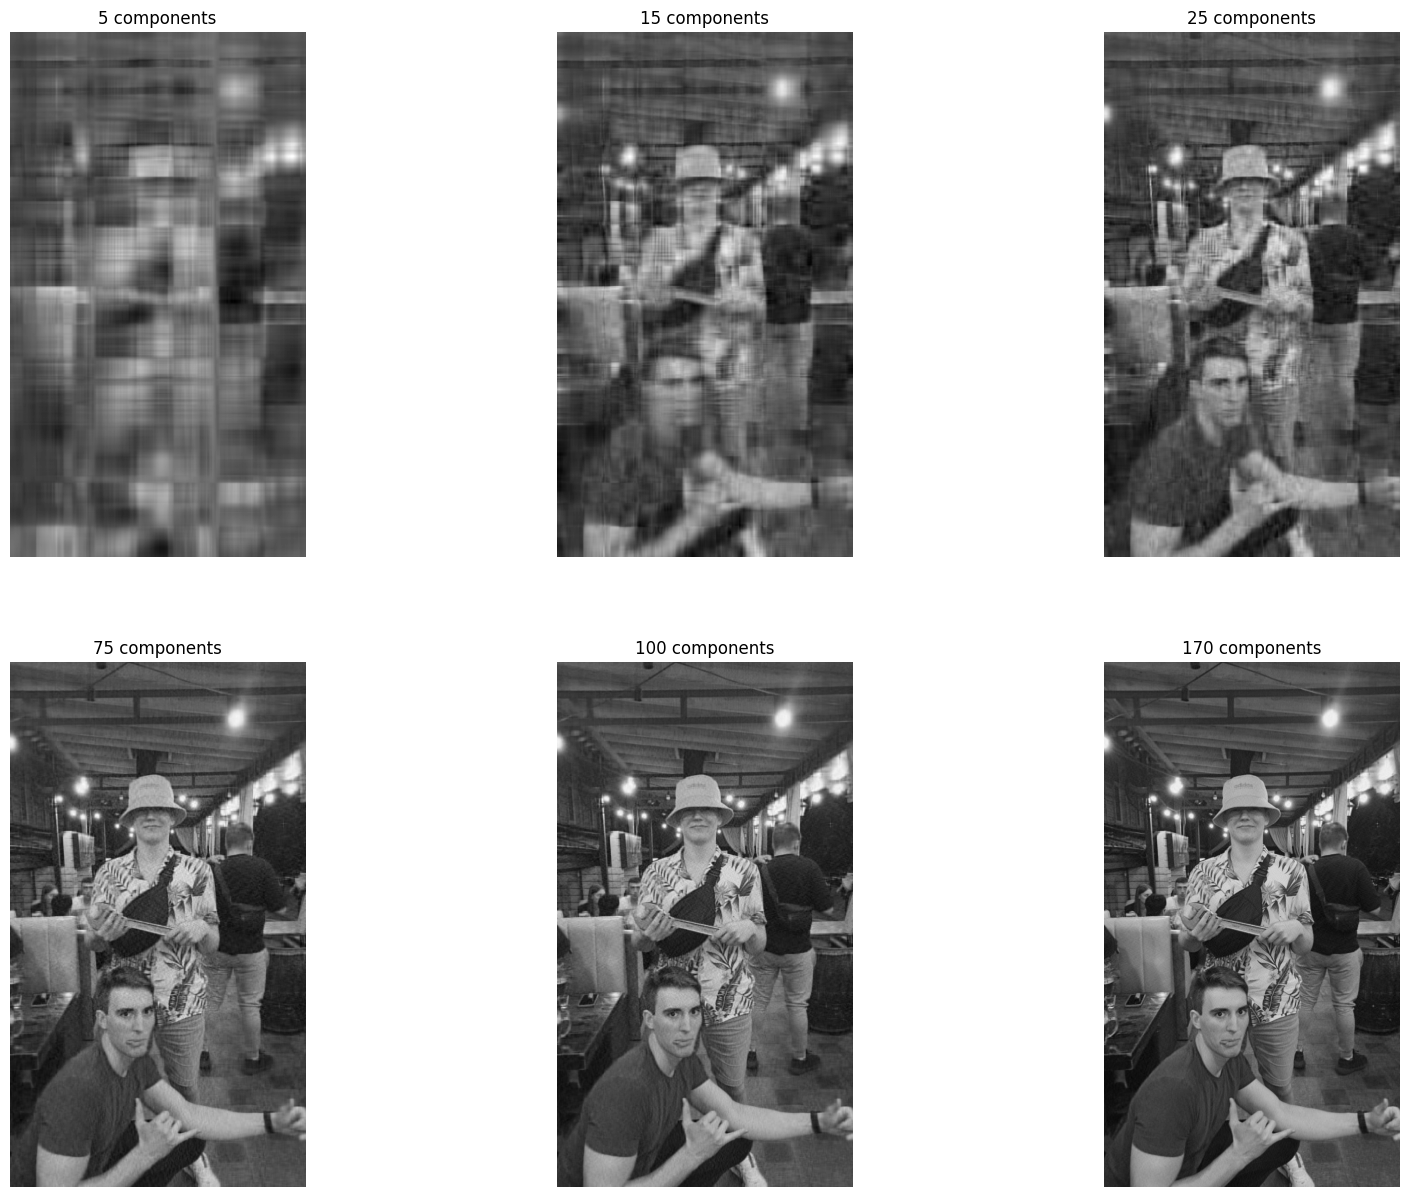

In [39]:
fig = plt.figure(figsize=(20, 15))
for i, n in enumerate([5, 15, 25, 75, 100, 170]):
    pca = PCA(n_components=n)
    image_pca = pca.fit_transform(image_bw)
    image_rec = pca.inverse_transform(image_pca)
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(image_rec, cmap='gray')
    ax.set_title(f'{n} components')
    ax.axis('off')

# Завдання 3

In [4]:
def encrypt_message(message, key_matrix):
    message_vector= np.array([ord(c) for c in message])
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    diagonalized_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
    encrypted_message = np.dot(diagonalized_key_matrix, message_vector)
    return encrypted_message


In [38]:
def decrypt_message(encrypted_message, key_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    diagonalized_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
    decrypted = np.dot(np.linalg.inv(diagonalized_key_matrix), encrypted_message)
    return ''.join([chr(int(round(i))) for i in decrypted])

In [40]:
message = "Hello, world!"
key_matrix = np.random.randint(0, 256, (len(message), len(message)))
enc_message = encrypt_message(message, key_matrix)
dec_message= decrypt_message(enc_message, key_matrix)
message, enc_message, dec_message

/var/folders/lf/fvhfkttd0435xbx5h395j__m0000gr/T/ipykernel_22990/1928114319.py:5: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  return ''.join([chr(int(round(i))) for i in decrypted])
/var/folders/lf/fvhfkttd0435xbx5h395j__m0000gr/T/ipykernel_22990/1928114319.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  return ''.join([chr(int(round(i))) for i in decrypted])


('Hello, world!',
 array([157530.-1.24465118e-11j, 148473.-2.06800917e-11j,
        146101.+1.89753984e-11j, 196015.-3.47031972e-11j,
        165683.-1.18889938e-11j, 129227.-1.96720227e-11j,
        134071.-9.52530366e-12j, 126711.-4.60887965e-12j,
        108463.-1.86018056e-11j, 202275.-1.00449728e-11j,
        179814.-1.65490259e-12j, 151938.-2.14379713e-11j,
        124301.-5.78115769e-12j]),
 'Hello, world!')